In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
fashion_mnist=tf.keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

Classnames are a set of list to adress each of the train labels from 1 to 10 categories into its names

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
#print(train_images,train_labels,test_images,test_labels)

Just to see the pixel values in pandas format

In [5]:
import pandas as pd
df=pd.DataFrame(fashion_mnist.load_data())
df.head(10)

,0,1
0,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, ..."
1,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4, ..."


In [6]:
print(train_images.shape,test_images.shape)

(60000, 28, 28) (10000, 28, 28)


Here we will plot the images in the dataset using matplotlib 

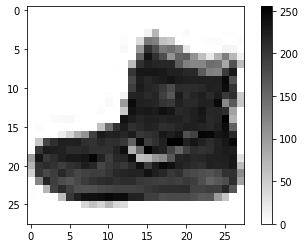

In [7]:
plt.figure()#to give dimension for plotting
plt.imshow(train_images[0],cmap='gray_r')#image show command with parameter 'gray_r' for converting it to black
plt.colorbar()#colorbar to show the corresponding pixel values
plt.show()

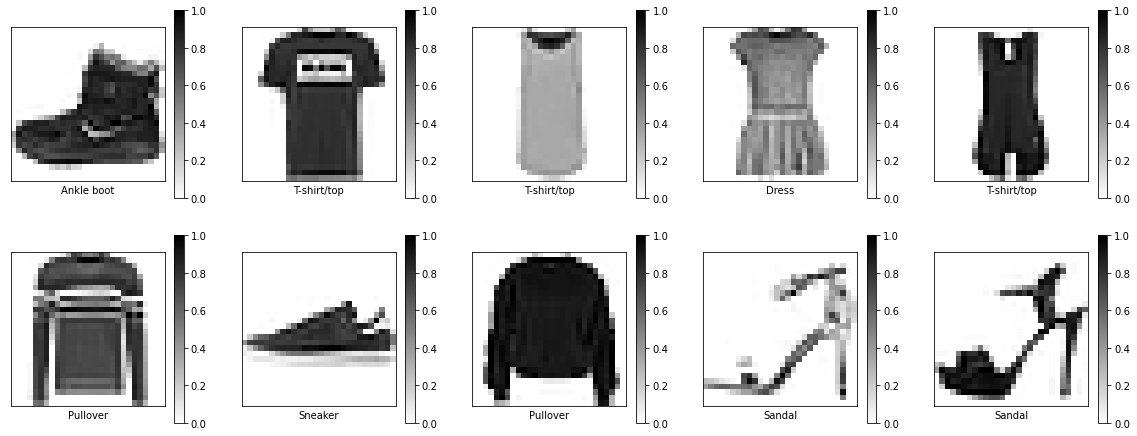

In [23]:
plt.figure(figsize=(20,20)) #figure with dimension of 20 by 20
for i in range(10): #first 10 images
    plt.subplot(5,5,i+1)
    plt.imshow(train_images[i],cmap='gray_r')
    plt.xlabel(class_names[train_labels[i]])
    plt.colorbar()
    plt.xticks([])
    plt.yticks([])
plt.show()

In [9]:
train_images=train_images.astype(float)/255.0
test_images=test_images.astype(float)/255.0

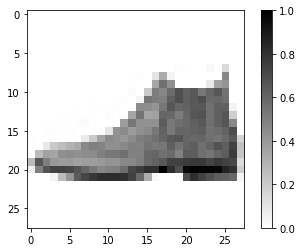

In [10]:
plt.figure()
plt.imshow(test_images[0],cmap='gray_r')
plt.colorbar()
plt.show()

In [11]:
model= tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])

In [17]:
earlyStopping=tf.keras.callbacks.EarlyStopping(patience=3)

In [19]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(train_images,train_labels,validation_split=0.25,epochs=10,callbacks=earlyStopping)

Epoch 1/10
1407/1407 [==============================] - 6s 3ms/step - loss: 0.1497 - accuracy: 0.9429 - val_loss: 0.1891 - val_accuracy: 0.9315
Epoch 2/10
1407/1407 [==============================] - 4s 3ms/step - loss: 0.1384 - accuracy: 0.9482 - val_loss: 0.1773 - val_accuracy: 0.9323
Epoch 3/10
1407/1407 [==============================] - 4s 3ms/step - loss: 0.1364 - accuracy: 0.9479 - val_loss: 0.1777 - val_accuracy: 0.9325
Epoch 4/10
1407/1407 [==============================] - 4s 3ms/step - loss: 0.1304 - accuracy: 0.9495 - val_loss: 0.1938 - val_accuracy: 0.9285
Epoch 5/10
1407/1407 [==============================] - 4s 3ms/step - loss: 0.1315 - accuracy: 0.9506 - val_loss: 0.1965 - val_accuracy: 0.9279


In [20]:
model.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.4126 - accuracy: 0.8871


[0.41257333755493164, 0.8870999813079834]

In [21]:
classifications=model.predict(test_images)
print(classifications[0])

[1.0204950e-12 1.9318196e-22 1.6738310e-12 2.3080917e-16 6.0863294e-15
 2.8197363e-08 3.2976582e-14 4.1520316e-06 4.2916671e-13 9.9999583e-01]
